# LOGISTIC REGRESSION AND KNN CLASSIFICATION WITH THE WINE QUALITY DATASET (98% ACCURACY)

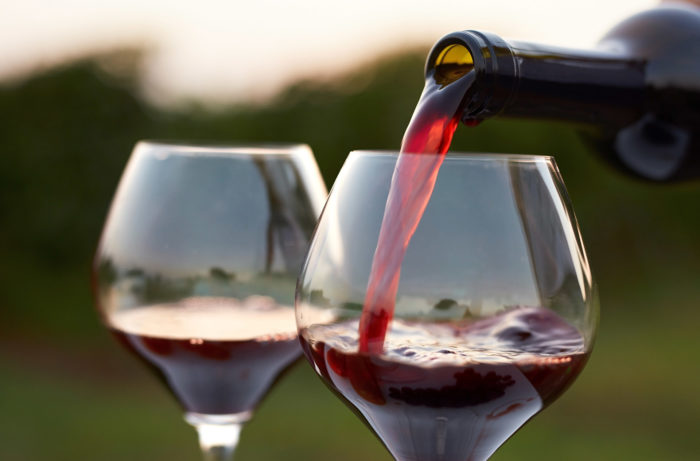

In [41]:
from IPython.display import Image
Image(filename = "redwine.jpg",width = 900, height = 500)

## PROJECT AIMS<br>
1) To perform exploratory data analysis on the wine quality dataset<br>
2) To perform data preprocessing so as to make it fit to pass it into the model<br>
3) To make predictions using Logistic Regression and K Nearest Neighbours classifier

### IMPORTING THE RELEVANT LIBRARIES

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:

data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking the unique values in the "quality" column helps me to get an idea about how many classifications there are and hence, the model for prediction is appropriately chosen

In [4]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## EXPLORATORY DATA ANALYSIS

**VOLATILE ACIDITY**<BR><BR>
**Volatile acidity** is the the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Hence makes sense to see if there is any relationship between the quality of wine and its volatile acidity. As expected, the volatile acidity is reduced in higher quality wines

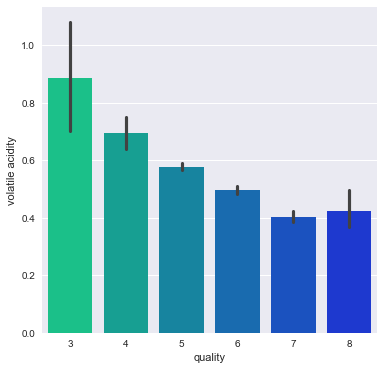

In [8]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "volatile acidity", data = data, palette = "winter_r")

**CITRIC ACID**<BR><BR>
**Citric acid** can add more freshness and flavour to wines in small quantities. As such, higher levels of citric acid content corresponds to higher quality in wines, as proved below

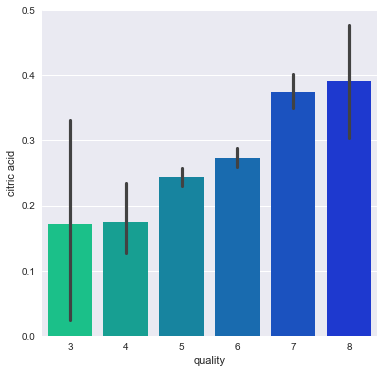

In [9]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "citric acid", data = data, palette = "winter_r")

**SULPHUR DIOXIDE**<BR><BR>
**Sulphur DiOxide** is used in wines to prevent growth of microbes. At higher quantities however (>50 ppm), the smell and taste of sulphur in wine becomes more evident. Though the use of SO2 is lower than 50 ppm in higher quality wines, it is also surprising that the same is low in the lower quantity wines. However, it may be the case that decreased usage of SO2 in the lower quality wines results in it being prone to microbial growth and oxidation. 

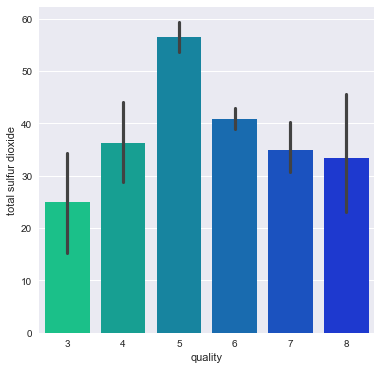

In [10]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "total sulfur dioxide", data = data, palette = "winter_r")

**pH LEVELS**<BR><BR>
**pH** corresponds to how acidic the wines are. Most of the wines have a pH between 3-4. Even though the pH of the lower quality wines is slightly higher than the higher quality wines, the overall acidity of all the quality wines are balanced

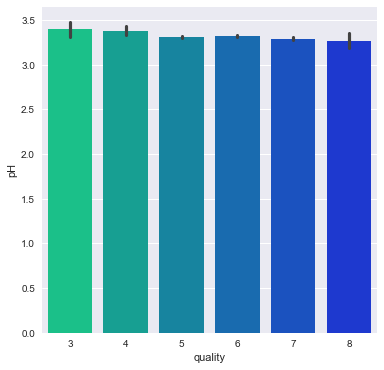

In [11]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "pH", data = data, palette = "winter_r")

**ALCOHOL LEVELS**<BR><BR>
**Alcohol** levels are definitely an important factor to judge wine quality. As proved below, higher quality wines have higher levels of alcohol in them

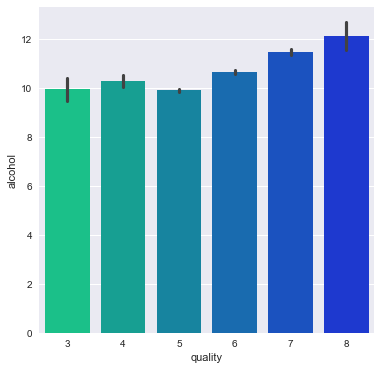

In [12]:
plt.subplots(figsize = (6,6))
sns.barplot(x = "quality", y= "alcohol", data = data, palette = "winter_r")

**CORRELATION HEATMAP**<BR>
Heatmaps are very useful for giving a summarised picture of the correlation between variables

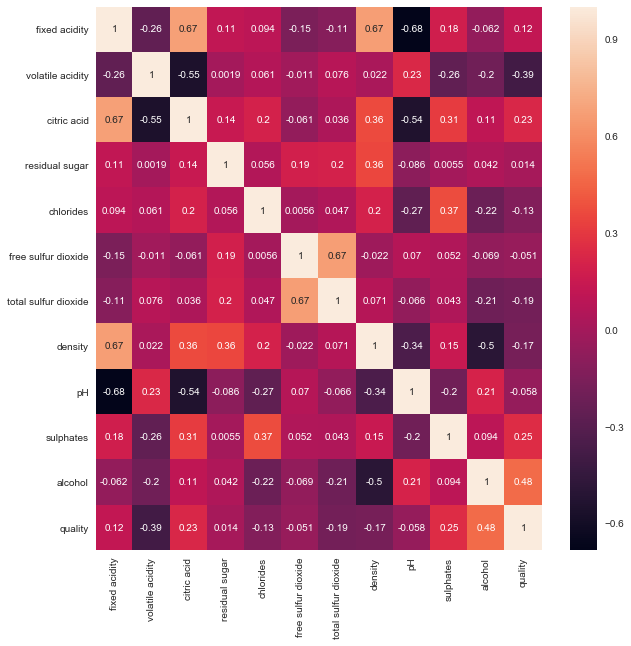

In [13]:
correlation = data.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation,annot = True)

<font size="5">**PREPROCESSING AND PREDICTIONS USING LOGISTIC AND KNN MODELS**</font>

### PREPROCESSING<br>
In the preprocessing stage, the primary changes that are made to the data are **Standard Scaling** and **Principal Component Analysis**. Based on the **Quality** column, a new column called **Review** is prepared so as to make the accuracy of predictions shoot up

The **Review** column is split up like this: <br>
1,2,3 --> Bad<br>
4,5,6,7 --> Average<br>
8,9,10 --> Excellent<br>

In [14]:
reviews = []
for i in data['quality']:
    
    if i >=1 and i<= 3:
        
        reviews.append('1')
        
    elif i >=4 and i<=7:
        
        reviews.append('2')
        
    elif i>=8 and i<=10:
        
        reviews.append('3')
data['Reviews'] = reviews
        

For further preprocessing operations, the predictor variables and the response variables are stored in two different variables<br>
Note that our new response variable shall be **reviews**

In [15]:
predictor_variables = data.iloc[:,:11]
response_variables = data.Reviews

### SCALING<br>
**Scaling**  is important for standardizing the data so that it can be fed into the models.<br>
Here, **Standard Scaling** is used

In [16]:
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(predictor_variables)

### DIMENSIONALITY REDUCTION<br>
A further step in the cleaning process, **dimensionality reduction** is used to remove unnecessary noise in the data and retain all those dimensions which are essential for the data. **Principal Component Analysis** is used for the dimensionality reduction


In [17]:
pca = PCA()
x_pca = pca.fit_transform(scaled_variables)

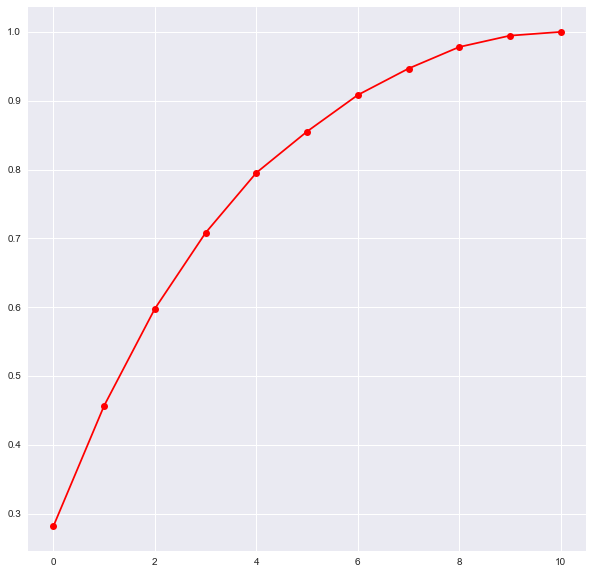

In [18]:
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-ro')
plt.grid(True)

As per the above graph, we can see that 8 principal components attribute for 90% of variation in the data. Hence,only 8 components shall be used for the prediction

In [19]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(scaled_variables)

**TRAIN TEST SPLIT**

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_new,response_variables, test_size = 0.2)

## THE LOGISTIC REGRESSION MODEL<br>
The logistic regression model can be used for both binary and multiclass classification.


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### SCORE

In [42]:
score_log = model.score(x_test, y_test)
score_log*100

98.4375

We are able to get an amazing accuracy score of **98%!!**. 

## THE KNN MODEL

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
classifier=  KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### SCORE

In [43]:
score_knn = classifier.score(x_test,y_test)
score_knn*100

98.4375

 Here too ,we are able to get  98% accuracy!!